In [1]:
from RealEstateAnalysis.Data import DataJson
from decimal import Decimal
from pprint import pprint as pp
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [2]:
fileName = "RealEstateAnalysis/SampleData/TaxParcels.json"

In [3]:
def parseMoney(money):
    return float(money.replace("$", ""))

In [14]:
def getCoordinates(obj):
    if obj['geometry']['type'] == 'MultiPolygon':
        return obj['geometry']['coordinates'][0][0][0]
    if obj['geometry']['type'] == 'Polygon':
        return obj['geometry']['coordinates'][0][0]
    else:
        return None
def getLatitude(obj):
    coords = getCoordinates(obj)
    if coords is not None:
        return coords[1]
    else:
        return None
def getLongitude(obj):
    coords = getCoordinates(obj)
    if coords is not None:
        return coords[0]
    else:
        return None

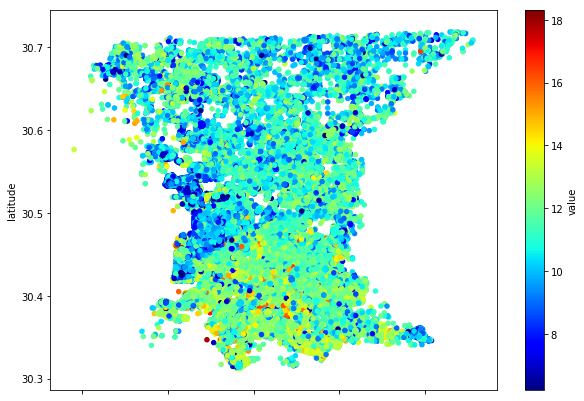

In [22]:
data = DataJson.new(fileName, ["features"])
data.where(lambda x: x['properties']['SUM_FAIR_MARKET'] > 0)
data.select( \
    value = lambda x: np.log(x['properties']['SUM_FAIR_MARKET']), \
    longitude = getLongitude, \
    latitude = getLatitude )
data.load()
df = data.dataFrame()
df.plot(kind="scatter", x='longitude', y='latitude',c='value', cmap=plt.get_cmap("jet"), figsize=(10,7))


,latitude,longitude,value
857,30.575942,-91.160645,0
1246,30.585742,-91.170216,0
1247,30.577367,-91.177490,0
2067,30.583389,-91.144987,0
2364,30.586652,-91.142409,0
2365,30.571073,-91.154266,0
2366,30.573935,-91.152567,0
2670,30.562379,-91.176968,0
2671,30.578583,-91.123016,0
2672,30.581116,-91.124078,0
